In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

start = dt.datetime.today() - dt.timedelta(360)
end = dt.datetime.today()


C:\Users\dhira\AppData\Local\Temp\ipykernel_23124\681423190.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  share_price = stock.history(period='1d')['Close'][0]
[*********************100%%**********************]  1 of 1 completed

Share Price: INR 32.75
EV Per Share: INR 78.17
The Intrinsic Value of RPOWER.NS is: 0.4190



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


The beta of RPOWER.NS relative to ^NSEI is: 1.61


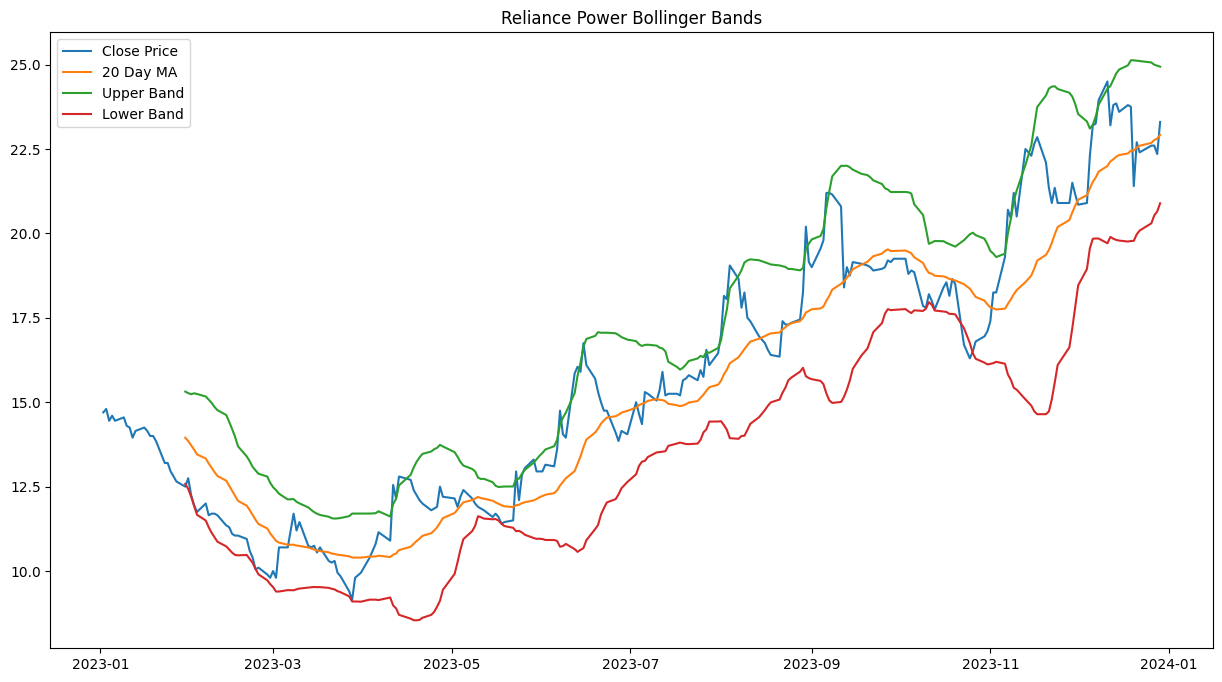

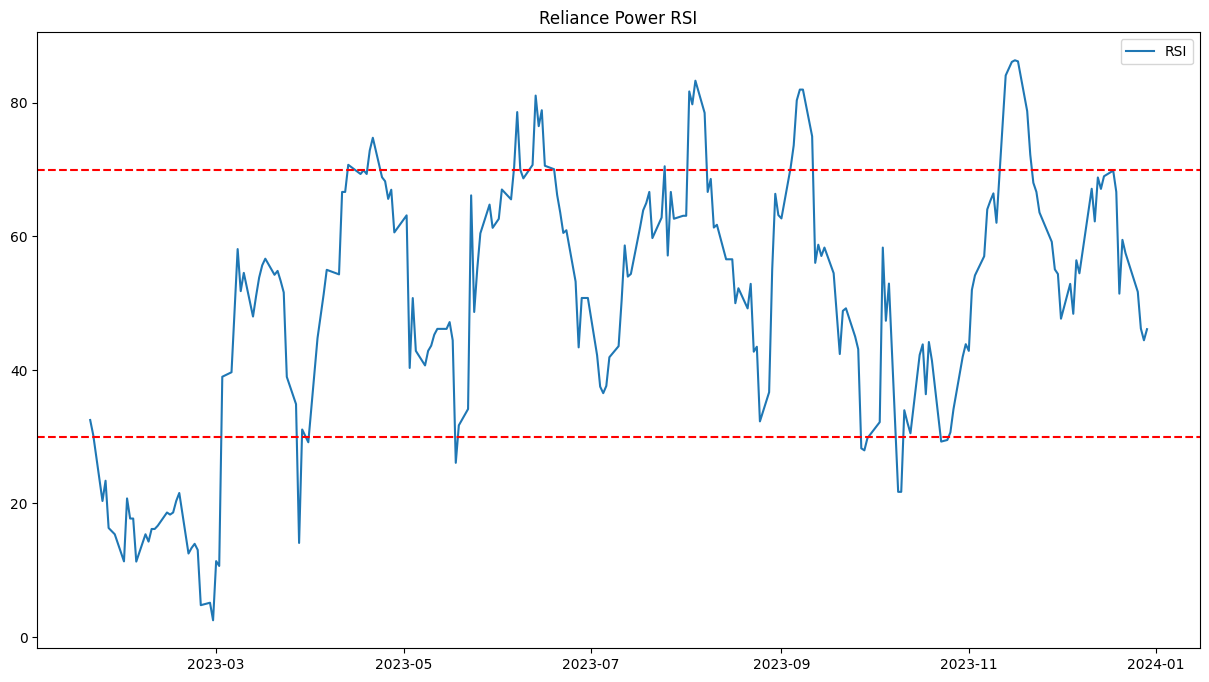

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

start = dt.datetime.today() - dt.timedelta(360)
end = dt.datetime.today()

def calculate_enterprise_value(ticker):
    stock = yf.Ticker(ticker)
    stock_info = stock.info
    market_cap = stock_info.get('marketCap', 0)          
    total_debt = stock_info.get('totalDebt', 0)         
    cash_equivalents = stock_info.get('totalCash', 0)    
    enterprise_value = market_cap + total_debt - cash_equivalents
    return enterprise_value, market_cap, total_debt, cash_equivalents

def calculate_intrinsic_value(ticker):
    stock = yf.Ticker(ticker)
    share_price = stock.history(period='1d')['Close'][0]  
    shares_outstanding = stock.info.get('sharesOutstanding', 0)  
    ev, market_cap, total_debt, cash_equivalents = calculate_enterprise_value(ticker)
    ev_per_share = ev / shares_outstanding if shares_outstanding else 0
    intrinsic_value = share_price / ev_per_share if ev_per_share else 0
    return intrinsic_value, share_price, ev_per_share

def calculate_beta(stock_ticker, benchmark_ticker, start_date, end_date):
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)['Close']
    benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)['Close']
    
    stock_returns = stock_data.pct_change().dropna()
    benchmark_returns = benchmark_data.pct_change().dropna()
    
    covariance = np.cov(stock_returns, benchmark_returns)[0, 1]
    variance = np.var(benchmark_returns)
    
    beta = covariance / variance
    return beta

# Define tickers and dates
stock_ticker = 'RPOWER.NS'
benchmark_ticker = '^NSEI'  
start_date = '2023-01-01'
end_date = '2024-01-01'

# Calculate intrinsic value and enterprise value
intrinsic_value, share_price, ev_per_share = calculate_intrinsic_value(stock_ticker)
print(f"Share Price: INR {share_price:.2f}")
print(f"EV Per Share: INR {ev_per_share:.2f}")
print(f"The Intrinsic Value of {stock_ticker} is: {intrinsic_value:.4f}")

# Calculate beta
beta = calculate_beta(stock_ticker, benchmark_ticker, start_date, end_date)
print(f"The beta of {stock_ticker} relative to {benchmark_ticker} is: {beta:.2f}")

# Download stock data for technical analysis
rpower_data = yf.download(stock_ticker, start=start_date, end=end_date)
rpower_data['20 Day MA'] = rpower_data['Close'].rolling(window=20).mean()
rpower_data['Upper Band'] = rpower_data['20 Day MA'] + 2 * rpower_data['Close'].rolling(window=20).std()
rpower_data['Lower Band'] = rpower_data['20 Day MA'] - 2 * rpower_data['Close'].rolling(window=20).std()
delta = rpower_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rpower_data['RSI'] = 100 - (100 / (1 + rs))

# Plot Bollinger Bands
plt.figure(figsize=(15,8))
plt.plot(rpower_data.index, rpower_data['Close'], label='Close Price')
plt.plot(rpower_data.index, rpower_data['20 Day MA'], label='20 Day MA')
plt.plot(rpower_data.index, rpower_data['Upper Band'], label='Upper Band')
plt.plot(rpower_data.index, rpower_data['Lower Band'], label='Lower Band')
plt.title('Reliance Power Bollinger Bands')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(15,8))
plt.plot(rpower_data.index, rpower_data['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='r', linestyle='--')
plt.title('Reliance Power RSI')
plt.legend()
plt.show()
